In [ ]:
!pip install antigranular

import antigranular as ag
session = ag.login("zvDy7tmNNggDoWFQK+BvgkhuE9kvWMbm", "gCjURa2OHO4Ebau+OjiFmBvM1kjHs15jU3ofsvyKi4xrRBln3e2s8Zu6sGgOR/i3", competition = "UN Datathon PETs Track")

In [ ]:
%%ag
df = load_dataset("undata_shock")

In [ ]:
%%ag
from ag_utils import export, ag_print

desc = df.describe(eps=0.1)

export(desc, "desc_")

Setting up exported variable in local environment: desc_


In [ ]:
desc_

In [ ]:
desc_ = desc_.drop(['objectid'], axis=1)

In [ ]:
desc_

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
features = desc_.drop('shock_noshock', axis=1)
target = desc_['shock_noshock']

In [ ]:
# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% train, 20% val, 20% test

In [ ]:
# Build a Random Forest regressor
regressor = RandomForestRegressor()

In [ ]:
# Train the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Model evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

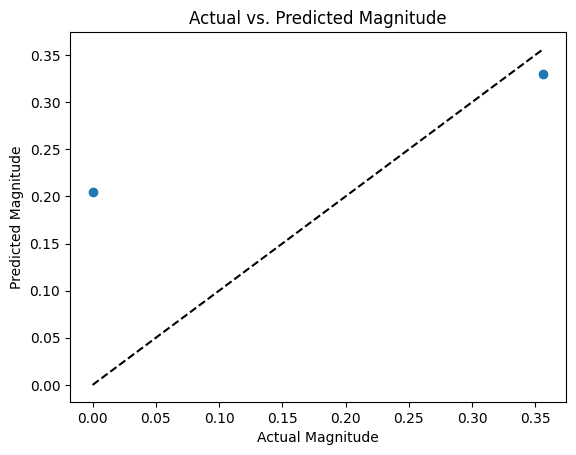

In [ ]:
# Visualize performance
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs. Predicted Magnitude')
plt.show()

In [ ]:
print('Mean Squared Error:', mse)


Mean Squared Error: 0.021389193861607817


In [ ]:
# Predict the probability of each shock happening in a given time period
probability = regressor.predict(X_val)
shock_probabilities = pd.DataFrame(data=probability, columns=['Probability'])

In [ ]:
# Append probabilities to the validation dataset
X_val_with_probabilities = pd.concat([X_val.reset_index(drop=True), shock_probabilities], axis=1)

In [ ]:
print('\nValidation Data with Shock Probabilities:')
print(X_val_with_probabilities)


Validation Data with Shock Probabilities:
   shock_sicknessordeathofhh  shock_lostemplorwork  shock_otherintrahhshock  \
0              104597.000000         104597.000000            104597.000000   
1                   0.972272              0.945028                 0.980412   

   shock_higherfoodprices  shock_higherfuelprices  shock_mvtrestrict  \
0           104597.000000           104597.000000      104597.000000   
1                0.982165                0.549157           0.562915   

   shock_othereconomicshock  shock_pestoutbreak  shock_plantdisease  \
0             104597.000000       104597.000000       104597.000000   
1                  0.389253            0.698263            0.977674   

   shock_animaldisease  ...  shock_landslides  shock_firenatural  \
0        104597.000000  ...      104597.00000      104597.000000   
1             0.948866  ...           0.39218           0.999928   

   shock_othernathazard  shock_violenceinsecconf  shock_theftofprodassets  \
0     